<a href="https://colab.research.google.com/github/chris-kehl/neuralNetworksBasic/blob/master/reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import reuters
from keras import models
from keras import layers
import numpy as np
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data (num_words=10000)

2113536/2110848 [==============================] - 1s 1us/step


In [0]:
len(train_data)

8982

In [0]:
len(test_data)

2246

In [0]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])


557056/550378 [==============================] - 1s 2us/step


In [0]:
train_labels[10]


3

In [0]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)            
x_test = vectorize_sequences(test_data)  
                            


In [0]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)        
one_hot_test_labels = to_one_hot(test_labels) 

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [0]:

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 2s 230us/step - loss: 2.4950 - acc: 0.4965 - val_loss: 1.6677 - val_acc: 0.6370
Epoch 2/20
7982/7982 [==============================] - 1s 152us/step - loss: 1.3646 - acc: 0.7070 - val_loss: 1.2729 - val_acc: 0.7130
Epoch 3/20
7982/7982 [==============================] - 1s 147us/step - loss: 1.0261 - acc: 0.7791 - val_loss: 1.1077 - val_acc: 0.7600
Epoch 4/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.8022 - acc: 0.8291 - val_loss: 1.0313 - val_acc: 0.7650
Epoch 5/20
7982/7982 [==============================] - 1s 146us/step - loss: 0.6435 - acc: 0.8592 - val_loss: 0.9378 - val_acc: 0.7950
Epoch 6/20
7982/7982 [==============================] - 1s 146us/step - loss: 0.5139 - acc: 0.8904 - val_loss: 0.8984 - val_acc: 0.8100
Epoch 7/20
7982/7982 [============

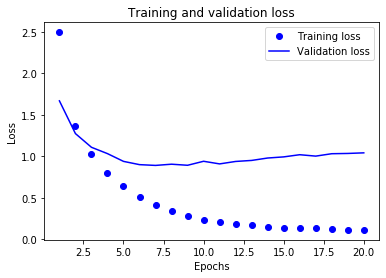

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


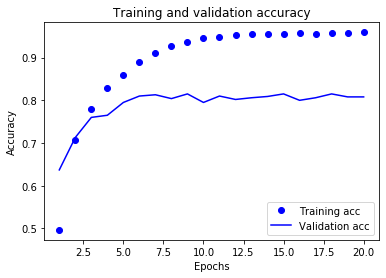

In [0]:
plt.clf()                                                

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [0]:

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 174us/step - loss: 2.7112 - acc: 0.4989 - val_loss: 1.8593 - val_acc: 0.6500
Epoch 2/9
7982/7982 [==============================] - 1s 148us/step - loss: 1.4921 - acc: 0.7081 - val_loss: 1.3743 - val_acc: 0.7050
Epoch 3/9
7982/7982 [==============================] - 1s 153us/step - loss: 1.0939 - acc: 0.7734 - val_loss: 1.1697 - val_acc: 0.7600
Epoch 4/9
7982/7982 [==============================] - 1s 149us/step - loss: 0.8526 - acc: 0.8226 - val_loss: 1.0622 - val_acc: 0.7750
Epoch 5/9
7982/7982 [==============================] - 1s 148us/step - loss: 0.6790 - acc: 0.8596 - val_loss: 1.0044 - val_acc: 0.7810
Epoch 6/9
7982/7982 [==============================] - 1s 147us/step - loss: 0.5415 - acc: 0.8913 - val_loss: 0.9562 - val_acc: 0.7990
Epoch 7/9
7982/7982 [==============================] - 1s 147us/step - loss: 0.4340 - acc: 0.9139 - val_loss: 0.9579 - val_acc: 0.8000
Epoch 8

In [0]:
results

[0.9935294138143239, 0.7916295636952826]

In [0]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19412288512911843

In [0]:
predictions = model.predict(x_test)

In [0]:
predictions[0].shape

(46,)

In [0]:
np.sum(predictions[0])

0.99999994

In [0]:
np.argmax(predictions[0])

3